# LECTURE 5: Linear Regression

Fertility<br>
Dataset:archive.ics.uci.edu/dataset/244/fertility

Perform regression analysis on your chosen dataset

In [18]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd

fertility = fetch_ucirepo(id=244)

X = fertility.data.features 
y = fertility.data.targets

df = pd.DataFrame(fertility.data.original, columns = fertility.headers)
df

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Choosing 'hrs_sitting' as the target variable
y = df['hrs_sitting']

# Drop non-numeric and target columns
X = df.drop(columns=['hrs_sitting', 'diagnosis'])

# Convert categorical variables to numeric
categorical_features = ['season', 'high_fevers', 'alcohol', 'smoking']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a regression model (e.g., Linear Regression)
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.04797339694029253
R-squared: -0.20316248416004723


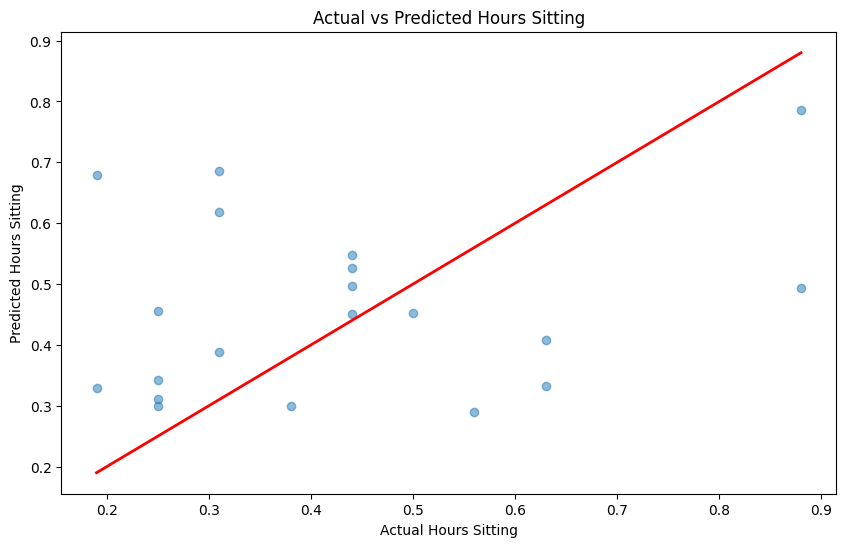

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Hours Sitting')
plt.ylabel('Predicted Hours Sitting')
plt.title('Actual vs Predicted Hours Sitting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line for reference
plt.show()